# Q3.2 Quadratic Least Square Fitting

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable as ptbl

## Importing database

In [2]:
data = pd.read_csv('Quadratic_curve_fitting_dataset.csv')

## Visualizing database

In [3]:
data.head()

,x,y
0,2,5
1,5,140
2,8,455
3,11,950
4,14,1625


## Extracing Dependent and independent variables from database in X and y variables respectively

In [4]:
X = data.iloc[:,0].values
y = data.iloc[:,1].values

## Quadratic Least square fitting function

## y = c1*x^2 + c2*x + c3
 

In [5]:
def QuadraticFitting(x,y):

    x_four_sum = sum(x**4)
    x_three_sum = sum(x**3)
    x_sq_sum = sum(x**2)
    x_sum = sum(x)
    n = len(x)

    y_xsq_sum = sum(y*(x**2))
    yx_sum = sum(x*y)
    y_sum = sum(y)

    A = np.array([
        [x_four_sum,  x_three_sum,  x_sq_sum],
        [x_three_sum, x_sq_sum,     x_sum],
        [x_sq_sum,    x_sum,        n],
        ])

    b = np.array([
        [y_xsq_sum],
        [yx_sum],
        [y_sum]
        ])

    invA = np.linalg.inv(A)
    M = np.matmul(invA,b)

    return M


## Calling Quadratic least square fitting function on given database

In [6]:
c1, c2, c3 = QuadraticFitting(X,y)

## Visualizing coefficients and constants

In [7]:
print(f"c1 = {c1}\tc2 = {c2}\tc3 = {c3}")

c1 = [10.]	c2 = [-25.]	c3 = [15.]


## Calculating Approximate Values

In [8]:
y_pred = c1*(X**2) + c2*X + c3

## Table of actual values and predicted values

In [9]:
table = ptbl(['X','y','y-predicted'])
for i in range(len(X)):
    table.add_row([X[i],y[i],y_pred[i]])
print(table)

+-----+--------+--------------------+
|  X  |   y    |    y-predicted     |
+-----+--------+--------------------+
|  2  |   5    | 5.000000000204238  |
|  5  |  140   | 140.00000000016325 |
|  8  |  455   | 455.0000000001246  |
|  11 |  950   | 950.0000000000882  |
|  14 |  1625  | 1625.0000000000541 |
|  17 |  2480  | 2480.0000000000223 |
|  20 |  3515  | 3514.9999999999927 |
|  23 |  4730  | 4729.999999999965  |
|  26 |  6125  | 6124.999999999941  |
|  29 |  7700  | 7699.999999999918  |
|  32 |  9455  | 9454.999999999898  |
|  35 | 11390  | 11389.99999999988  |
|  38 | 13505  | 13504.999999999865 |
|  41 | 15800  | 15799.99999999985  |
|  44 | 18275  | 18274.99999999984  |
|  47 | 20930  | 20929.999999999833 |
|  50 | 23765  | 23764.999999999825 |
|  53 | 26780  | 26779.99999999982  |
|  56 | 29975  | 29974.999999999818 |
|  59 | 33350  | 33349.99999999982  |
|  62 | 36905  | 36904.999999999825 |
|  65 | 40640  | 40639.999999999825 |
|  68 | 44555  | 44554.99999999983  |
|  71 | 4865

## Visualizing Best Fit Curve

### Note: The database used here was generated by me using Microsoft EXCEL
### that's why the actual points are perfectly overlapping with approximate line

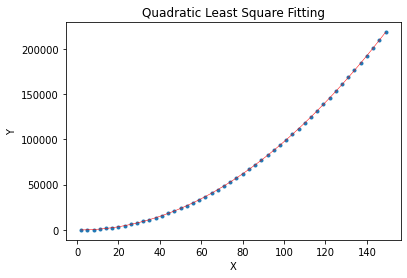

In [10]:
plt.scatter(X,y, marker = '.')
plt.plot(X,y_pred,color = 'red',linewidth = 0.5)
plt.title('Quadratic Least Square Fitting')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Evaluating Error in reconstruction

In [11]:
max_error = max(abs(y-y_pred)/y)
print(max_error)

4.084768079337664e-11


## Error is less because the data was generate using excel

In [12]:
for i in range(5):
    print(f"y[{i}] = {y[i]}\ty_predict[{i}] = {y_pred[i]}")

y[0] = 5	y_predict[0] = 5.000000000204238
y[1] = 140	y_predict[1] = 140.00000000016325
y[2] = 455	y_predict[2] = 455.0000000001246
y[3] = 950	y_predict[3] = 950.0000000000882
y[4] = 1625	y_predict[4] = 1625.0000000000541
